In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [18]:
df = pd.read_csv('malware.csv')

In [19]:
df.head(5)

,hash,millisecond,classification,os,state,usage_counter,prio,static_prio,normal_prio,policy,...,nivcsw,min_flt,maj_flt,fs_excl_counter,lock,utime,stime,gtime,cgtime,signal_nvcsw
0,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,0,malware,CentOS,0,0,3069378560,14274,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
1,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,1,malware,Windows,0,0,3069378560,14274,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
2,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,2,malware,Mac,0,0,3069378560,14274,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
3,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,3,malware,Ubuntu,0,0,3069378560,14274,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
4,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,4,malware,Mac,0,0,3069378560,14274,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0


In [20]:
#Getting required columns###
df_new = df[['classification', 'os', 'usage_counter', 'prio', 'static_prio', 'normal_prio', 'vm_pgoff', 'vm_truncate_count', 'task_size', 'map_count', 'hiwater_rss', 'total_vm', 'shared_vm', 'exec_vm', 'reserved_vm', 'nr_ptes', 'nvcsw', 'nivcsw','signal_nvcsw']]

In [21]:
df.shape

(100000, 36)

In [22]:
df_new.shape

(100000, 19)

In [23]:
#checking for null values###
df_new.isnull().sum()

classification       0
os                   0
usage_counter        0
prio                 0
static_prio          0
normal_prio          0
vm_pgoff             0
vm_truncate_count    0
task_size            0
map_count            0
hiwater_rss          0
total_vm             0
shared_vm            0
exec_vm              0
reserved_vm          0
nr_ptes              0
nvcsw                0
nivcsw               0
signal_nvcsw         0
dtype: int64

In [24]:
df_new.head(5)

,classification,os,usage_counter,prio,static_prio,normal_prio,vm_pgoff,vm_truncate_count,task_size,map_count,hiwater_rss,total_vm,shared_vm,exec_vm,reserved_vm,nr_ptes,nvcsw,nivcsw,signal_nvcsw
0,malware,CentOS,0,3069378560,14274,0,0,13173,0,6850,0,150,120,124,210,0,341974,0,0
1,malware,Windows,0,3069378560,14274,0,0,13173,0,6850,0,150,120,124,210,0,341974,0,0
2,malware,Mac,0,3069378560,14274,0,0,13173,0,6850,0,150,120,124,210,0,341974,0,0
3,malware,Ubuntu,0,3069378560,14274,0,0,13173,0,6850,0,150,120,124,210,0,341974,0,0
4,malware,Mac,0,3069378560,14274,0,0,13173,0,6850,0,150,120,124,210,0,341974,0,0


In [25]:
df_new.dtypes

classification       object
os                   object
usage_counter         int64
prio                  int64
static_prio           int64
normal_prio           int64
vm_pgoff              int64
vm_truncate_count     int64
task_size             int64
map_count             int64
hiwater_rss           int64
total_vm              int64
shared_vm             int64
exec_vm               int64
reserved_vm           int64
nr_ptes               int64
nvcsw                 int64
nivcsw                int64
signal_nvcsw          int64
dtype: object

In [26]:
df['os'].unique()

array(['CentOS', 'Windows', 'Mac', 'Ubuntu', 'Debian'], dtype=object)

In [27]:
#converting categorical variable to nominal
df_discretized=df_new.copy(deep=True)
os = df['os']
le = preprocessing.LabelEncoder()
le.fit(os)
os_encoded = le.transform(os)
print(os_encoded)
df_discretized['os'] = os_encoded


[0 4 2 ... 0 3 2]


In [28]:
df_discretized.head(5)

,classification,os,usage_counter,prio,static_prio,normal_prio,vm_pgoff,vm_truncate_count,task_size,map_count,hiwater_rss,total_vm,shared_vm,exec_vm,reserved_vm,nr_ptes,nvcsw,nivcsw,signal_nvcsw
0,malware,0,0,3069378560,14274,0,0,13173,0,6850,0,150,120,124,210,0,341974,0,0
1,malware,4,0,3069378560,14274,0,0,13173,0,6850,0,150,120,124,210,0,341974,0,0
2,malware,2,0,3069378560,14274,0,0,13173,0,6850,0,150,120,124,210,0,341974,0,0
3,malware,3,0,3069378560,14274,0,0,13173,0,6850,0,150,120,124,210,0,341974,0,0
4,malware,2,0,3069378560,14274,0,0,13173,0,6850,0,150,120,124,210,0,341974,0,0


In [29]:
#since some of the columns in data table have only 0's we removed them beacuse it will create problems during normalization### 
df_discretized1 = df_discretized.drop(['usage_counter','normal_prio','vm_pgoff','task_size','hiwater_rss','nr_ptes','signal_nvcsw'],axis=1)

In [30]:
df_discretized1.head(5)

,classification,os,prio,static_prio,vm_truncate_count,map_count,total_vm,shared_vm,exec_vm,reserved_vm,nvcsw,nivcsw
0,malware,0,3069378560,14274,13173,6850,150,120,124,210,341974,0
1,malware,4,3069378560,14274,13173,6850,150,120,124,210,341974,0
2,malware,2,3069378560,14274,13173,6850,150,120,124,210,341974,0
3,malware,3,3069378560,14274,13173,6850,150,120,124,210,341974,0
4,malware,2,3069378560,14274,13173,6850,150,120,124,210,341974,0


In [31]:
#normalization of the data#
for col in df_discretized1.columns:
    if col != 'classification':
        df_discretized1[col]=(df_discretized1[col]-df_discretized1[col].min())/(df_discretized1[col].max()-df_discretized1[col].min())

In [32]:
df_discretized1

,classification,os,prio,static_prio,vm_truncate_count,map_count,total_vm,shared_vm,exec_vm,reserved_vm,nvcsw,nivcsw
0,malware,0.00,0.182540,0.016007,0.199175,0.16651,0.052031,1.0,0.307692,0.249311,0.091519,0.000000
1,malware,1.00,0.182540,0.016007,0.199175,0.16651,0.052031,1.0,0.307692,0.249311,0.091519,0.000000
2,malware,0.50,0.182540,0.016007,0.199175,0.16651,0.052031,1.0,0.307692,0.249311,0.091519,0.000000
3,malware,0.75,0.182540,0.016007,0.199175,0.16651,0.052031,1.0,0.307692,0.249311,0.091519,0.000000
4,malware,0.50,0.182540,0.016007,0.199175,0.16651,0.052031,1.0,0.307692,0.249311,0.091519,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,malware,0.00,0.928571,0.000000,0.040717,0.04153,0.012830,1.0,0.048077,0.084022,0.000000,0.005479
99996,malware,1.00,0.928571,0.000000,0.040717,0.04153,0.012830,1.0,0.048077,0.084022,0.000000,0.005479
99997,malware,0.00,0.928571,0.000000,0.040717,0.04153,0.012830,1.0,0.048077,0.084022,0.000000,0.005479
99998,malware,0.75,0.928571,0.000000,0.040717,0.04153,0.012830,1.0,0.048077,0.084022,0.000000,0.005479


In [33]:
df_normalised = df_discretized1.copy(deep=True)

In [34]:
df_normalised

,classification,os,prio,static_prio,vm_truncate_count,map_count,total_vm,shared_vm,exec_vm,reserved_vm,nvcsw,nivcsw
0,malware,0.00,0.182540,0.016007,0.199175,0.16651,0.052031,1.0,0.307692,0.249311,0.091519,0.000000
1,malware,1.00,0.182540,0.016007,0.199175,0.16651,0.052031,1.0,0.307692,0.249311,0.091519,0.000000
2,malware,0.50,0.182540,0.016007,0.199175,0.16651,0.052031,1.0,0.307692,0.249311,0.091519,0.000000
3,malware,0.75,0.182540,0.016007,0.199175,0.16651,0.052031,1.0,0.307692,0.249311,0.091519,0.000000
4,malware,0.50,0.182540,0.016007,0.199175,0.16651,0.052031,1.0,0.307692,0.249311,0.091519,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,malware,0.00,0.928571,0.000000,0.040717,0.04153,0.012830,1.0,0.048077,0.084022,0.000000,0.005479
99996,malware,1.00,0.928571,0.000000,0.040717,0.04153,0.012830,1.0,0.048077,0.084022,0.000000,0.005479
99997,malware,0.00,0.928571,0.000000,0.040717,0.04153,0.012830,1.0,0.048077,0.084022,0.000000,0.005479
99998,malware,0.75,0.928571,0.000000,0.040717,0.04153,0.012830,1.0,0.048077,0.084022,0.000000,0.005479


In [35]:
#label encoding the target variable and removing it from the feature table###
from sklearn import preprocessing
y = df_normalised['classification']
le = preprocessing.LabelEncoder()
le.fit(y)
y_encoded = le.transform(y) 

print(y_encoded)
df_normalised['classification'] = y_encoded
x_features = df_normalised.drop('classification',axis=1)

[1 1 1 ... 1 1 1]


In [36]:
# splitting the data into test and train with training as 75% and test data as 25%#######
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_features, y_encoded, 
                                                    test_size=0.25, random_state = 42, stratify=None)

In [37]:
x_train.shape

(75000, 11)

In [38]:
x_test.shape

(25000, 11)

In [39]:
y_train.shape

(75000,)

In [50]:
is_contiguous = np.ascontiguousarray(x_test).flags.c_contiguous
print(is_contiguous)

True


In [46]:
from sklearn import neighbors
for k in range(1,1000,100): 
    clf=neighbors.KNeighborsClassifier(n_neighbors=k, metric='cosine')
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print('K =', k, ', Accuracy: ', accuracy_score(y_test, y_pred), ', Precision: ', precision_score(y_test, y_pred, average='macro', zero_division=0),
         ', Recall: ', recall_score(y_test, y_pred, average='macro', zero_division=0))

/Users/ruthvikkilaru/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


K = 1 , Accuracy:  1.0 , Precision:  1.0 , Recall:  1.0


/Users/ruthvikkilaru/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


K = 101 , Accuracy:  0.98832 , Precision:  0.9883581805619792 , Recall:  0.9883225499379517


/Users/ruthvikkilaru/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


K = 201 , Accuracy:  0.9728 , Precision:  0.9728000434995425 , Recall:  0.9727999466700632


/Users/ruthvikkilaru/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


K = 301 , Accuracy:  0.945 , Precision:  0.9450059647393395 , Recall:  0.9450010803523388


/Users/ruthvikkilaru/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


K = 401 , Accuracy:  0.918 , Precision:  0.9180000772992598 , Recall:  0.9179998846847638


/Users/ruthvikkilaru/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


K = 501 , Accuracy:  0.92292 , Precision:  0.9232439832828938 , Recall:  0.922912292625295


/Users/ruthvikkilaru/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


K = 601 , Accuracy:  0.92384 , Precision:  0.9239367406057652 , Recall:  0.92383580971491


/Users/ruthvikkilaru/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


K = 701 , Accuracy:  0.9076 , Precision:  0.9076021904087617 , Recall:  0.9076006878235757


/Users/ruthvikkilaru/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


K = 801 , Accuracy:  0.90908 , Precision:  0.9091418292263989 , Recall:  0.9090765890864183


/Users/ruthvikkilaru/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


K = 901 , Accuracy:  0.91392 , Precision:  0.9139199542271927 , Recall:  0.9139200178053176


/Users/ruthvikkilaru/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/ruthvikkilaru/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None 

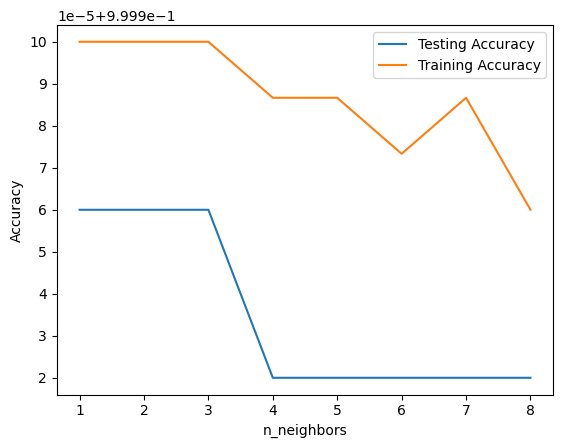

In [306]:
neighbors = np.arange(1, 9)
training_accuracy = np.empty(len(neighbors))
testing_accuracy = np.empty(len(neighbors))
  
for i, k in enumerate(neighbors):
    classifier = KNeighborsClassifier(n_neighbors=k, metric ='cosine')
    classifier.fit(x_train, y_train)
      
    training_accuracy[i] = classifier.score(x_train, y_train)
    testing_accuracy[i] = classifier.score(x_test, y_test)
  
plt.plot(neighbors, testing_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, training_accuracy, label = 'Training Accuracy')
  
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

In [311]:
from sklearn import neighbors
for k in range(1,1000,100): 
    clf=neighbors.KNeighborsClassifier(n_neighbors=k, metric='manhattan')
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print('K =', k, ', Accuracy: ', accuracy_score(y_test, y_pred), ', Precision: ', precision_score(y_test, y_pred, average='macro', zero_division=0),
         ', Recall: ', recall_score(y_test, y_pred, average='macro', zero_division=0))

/Users/ruthvikkilaru/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


K = 1 , Accuracy:  1.0 , Precision:  1.0 , Recall:  1.0


/Users/ruthvikkilaru/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


K = 101 , Accuracy:  0.99584 , Precision:  0.9958433184270772 , Recall:  0.9958408050956764


/Users/ruthvikkilaru/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


K = 201 , Accuracy:  0.9886 , Precision:  0.988607039636664 , Recall:  0.9886011388253171


/Users/ruthvikkilaru/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


K = 301 , Accuracy:  0.974 , Precision:  0.9740037405420119 , Recall:  0.9739992750461726


/Users/ruthvikkilaru/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


K = 401 , Accuracy:  0.971 , Precision:  0.9710027230665463 , Recall:  0.9709993861054075


/Users/ruthvikkilaru/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


K = 501 , Accuracy:  0.97052 , Precision:  0.9705200568453134 , Recall:  0.9705201923551323


/Users/ruthvikkilaru/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


K = 601 , Accuracy:  0.966 , Precision:  0.9660150965434755 , Recall:  0.965998466137119


/Users/ruthvikkilaru/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


K = 701 , Accuracy:  0.95972 , Precision:  0.9598626564393569 , Recall:  0.9597151265666637


/Users/ruthvikkilaru/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


K = 801 , Accuracy:  0.95512 , Precision:  0.9552309190375987 , Recall:  0.9551156851242788


/Users/ruthvikkilaru/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


K = 901 , Accuracy:  0.94788 , Precision:  0.9480239492926722 , Recall:  0.9478750332536104


In [313]:
from sklearn import neighbors
for k in range(1,1000,100): 
    clf=neighbors.KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print('K =', k, ', Accuracy: ', accuracy_score(y_test, y_pred), ', Precision: ', precision_score(y_test, y_pred, average='macro', zero_division=0),
         ', Recall: ', recall_score(y_test, y_pred, average='macro', zero_division=0))

/Users/ruthvikkilaru/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


K = 1 , Accuracy:  1.0 , Precision:  1.0 , Recall:  1.0


/Users/ruthvikkilaru/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


K = 101 , Accuracy:  0.98332 , Precision:  0.9833201390919822 , Recall:  0.9833202411692277


/Users/ruthvikkilaru/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


K = 201 , Accuracy:  0.966 , Precision:  0.9661459913011816 , Recall:  0.9659951061360653


/Users/ruthvikkilaru/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


K = 301 , Accuracy:  0.93216 , Precision:  0.9321602923254677 , Recall:  0.9321602923254677


/Users/ruthvikkilaru/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


K = 401 , Accuracy:  0.9026 , Precision:  0.9026410874236495 , Recall:  0.9026028590562566


/Users/ruthvikkilaru/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


K = 501 , Accuracy:  0.90048 , Precision:  0.900536580229162 , Recall:  0.9004766983894926


/Users/ruthvikkilaru/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


K = 601 , Accuracy:  0.91204 , Precision:  0.9126478158512003 , Recall:  0.9120292876123846


/Users/ruthvikkilaru/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


K = 701 , Accuracy:  0.90608 , Precision:  0.9062020212026723 , Recall:  0.9060751769451755


/Users/ruthvikkilaru/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


K = 801 , Accuracy:  0.89956 , Precision:  0.8997404549066412 , Recall:  0.8995540773001587


/Users/ruthvikkilaru/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


K = 901 , Accuracy:  0.8976 , Precision:  0.8978032778124169 , Recall:  0.897593695885383


In [ ]:
# We have choosen values of k from 1 to 1000 with 100 interval because we have a large dataset comprising og 100k datapoints
and we have choosen diffrent paramaters comprising of different distances like eucledian, manhattan, cosine and we see accuracies decreasing from 
99 to 89 for all the distances which is a sign for reducing overfitting####

In [314]:
from sklearn.model_selection import cross_val_score
k1 = [200, 300, 500, 750, 1000]
for k in k1: 
    clf=neighbors.KNeighborsClassifier(k, metric='euclidean')
    acc=cross_val_score(clf, x_features, y_encoded, cv=5, scoring='accuracy').mean()
    print('K =', k, ', Accuracy: ',acc)

/Users/ruthvikkilaru/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/ruthvikkilaru/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None 

K = 200 , Accuracy:  0.7503399999999999


/Users/ruthvikkilaru/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/ruthvikkilaru/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None 

K = 300 , Accuracy:  0.75694


/Users/ruthvikkilaru/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/ruthvikkilaru/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None 

K = 500 , Accuracy:  0.80471


/Users/ruthvikkilaru/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/ruthvikkilaru/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None 

K = 750 , Accuracy:  0.80135


/Users/ruthvikkilaru/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/ruthvikkilaru/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None 

K = 1000 , Accuracy:  0.80565


In [315]:
k1 = [200, 300, 500, 750, 1000]
for k in k1: 
    clf=neighbors.KNeighborsClassifier(k, metric='manhattan')
    acc=cross_val_score(clf, x_features, y_encoded, cv=5, scoring='accuracy').mean()
    print('K =', k, ', Accuracy: ',acc)

/Users/ruthvikkilaru/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/ruthvikkilaru/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None 

K = 200 , Accuracy:  0.79535


/Users/ruthvikkilaru/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/ruthvikkilaru/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None 

K = 300 , Accuracy:  0.79713


/Users/ruthvikkilaru/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/ruthvikkilaru/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None 

K = 500 , Accuracy:  0.80794


/Users/ruthvikkilaru/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/ruthvikkilaru/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None 

K = 750 , Accuracy:  0.8107900000000001


/Users/ruthvikkilaru/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/ruthvikkilaru/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None 

K = 1000 , Accuracy:  0.80616


In [ ]:
# We have choosen values of k [200, 300, 500, 750, 1000] because we have a large dataset comprising og 100k datapoints and cross_val_score with n as 5
and we have choosen diffrent paramaters comprising of different distances like eucledian, manhattan and we have seen some accuracies starting from 
79 to 80 for both the distances####

